In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
df= pandas.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [31]:
print(df.columns)
print('----')
print(df.info())

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                   

In [32]:
import wordcloud as wc
seri1= df['negativereason_gold']
seri1.dropna(inplace= True)
print(len(seri1), len(seri2), len(seri3))
df.drop(['negativereason_gold', 'tweet_coord', 'airline_sentiment_gold'], axis= 1, inplace= True)

32 40 1019


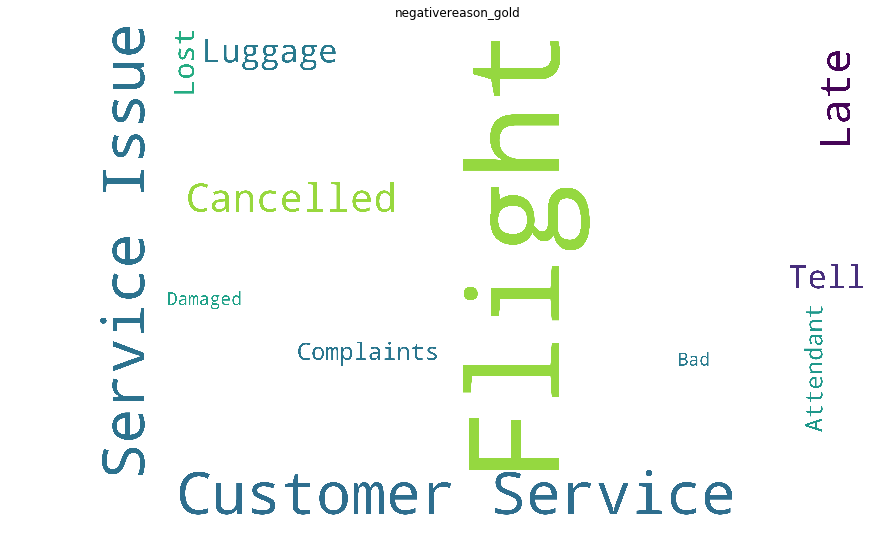

In [33]:
from wordcloud import WordCloud, STOPWORDS

words1 = ' '.join(seri1)
cleaned_word1= " ".join([word for word in words1.split() if 'http' not in word and not word.startswith('@') and not word.startswith('#') and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=5000, height=3000).generate(cleaned_word1)
plt.figure(figsize=(15, 15))
plt.title('negativereason_gold')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [35]:
c_= df['airline_sentiment'].value_counts()

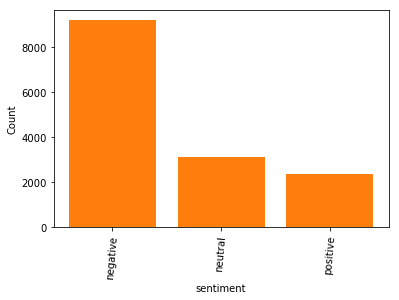

In [38]:
x= [0, 1, 2]
plt.bar(x,c_)
plt.xticks(x,['negative','neutral','positive'],rotation=85)
plt.ylabel('Count')
plt.xlabel('sentiment')
plt.show()

In [42]:
print(df['airline'].value_counts())
air= df['airline'].unique()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


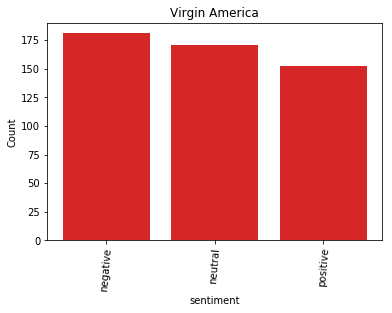

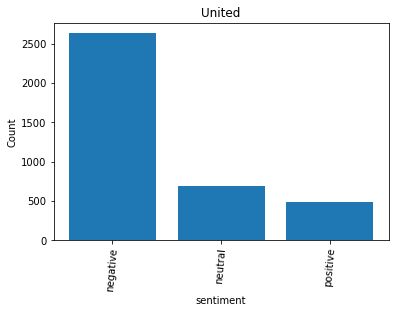

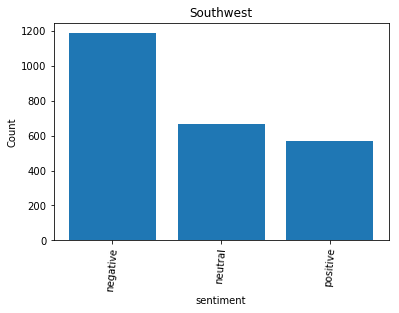

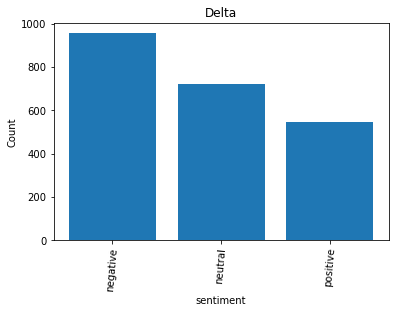

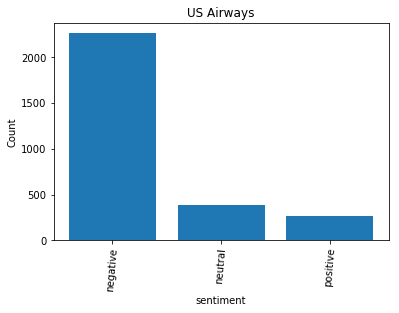

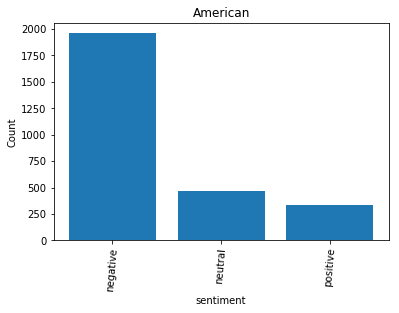

In [47]:
for i in air:
    x= [0, 1, 2]
    d_= df[df['airline']==i]
    plt.bar(x,d_['airline_sentiment'].value_counts())
    plt.xticks(x,['negative','neutral','positive'],rotation=85)
    plt.ylabel('Count')
    plt.xlabel('sentiment')
    plt.title(i)
    plt.show()

**So sentiment of United, US Airways, American are predominantly negative**

In [50]:
c_1=dict(df['negativereason'].value_counts(sort=False))

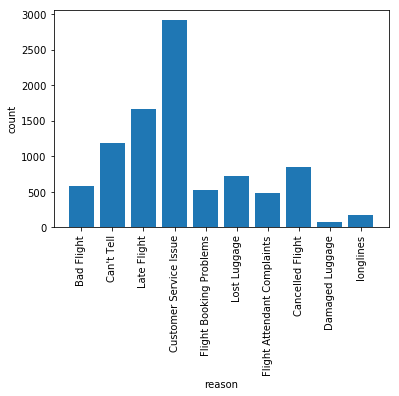

In [58]:
count=dict(df['negativereason'].value_counts())
u=list(df['negativereason'].unique())
u=[x for x in u if str(x) != 'nan']
r=pandas.DataFrame({'Reasons':u})
r['count']=r['Reasons'].apply(lambda x: count[x])
count=r['count']
x= range(0,len(r))
plt.bar(x,count)
plt.xticks(x,r['Reasons'],rotation=90)
plt.ylabel('count')
plt.xlabel('reason')
plt.show()

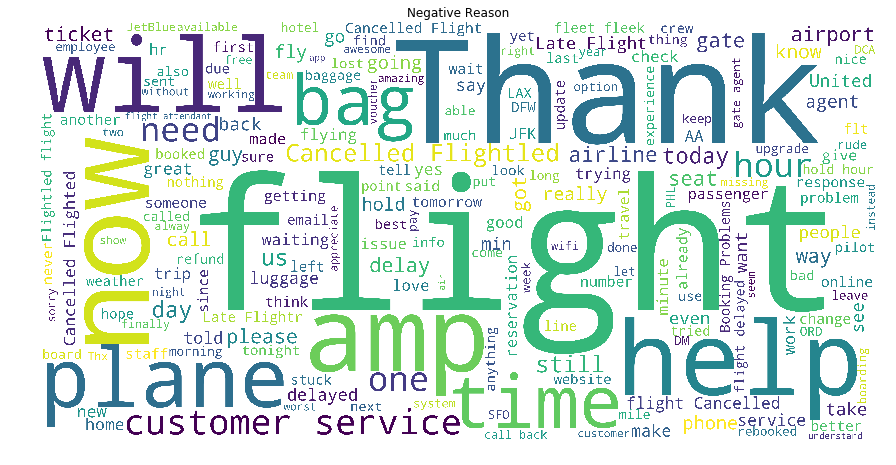

In [57]:
d_11=df[df['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word1= " ".join([word for word in words.split() if 'http' not in word and not word.startswith('@') and not word.startswith('#') and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=8000, height=4000).generate(cleaned_word1)
plt.figure(figsize=(15, 15))
plt.title('Negative Reason')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

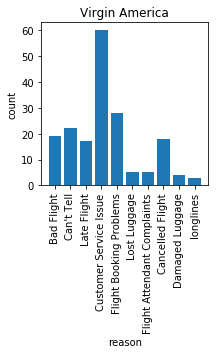

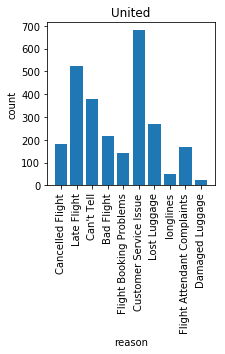

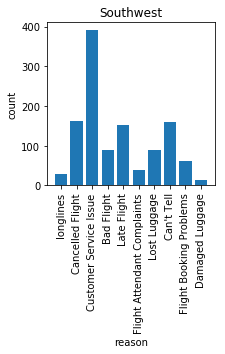

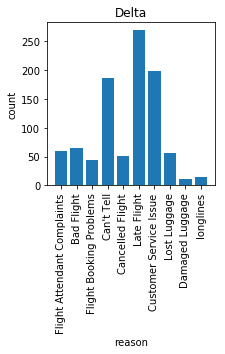

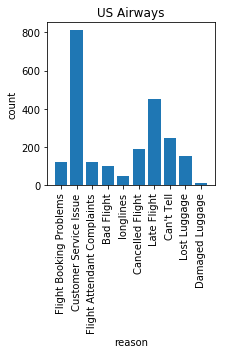

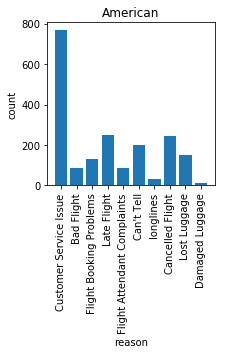

In [61]:
for i in air:
    df_l= df[df['airline']== i]
    count=dict(df_l['negativereason'].value_counts())
    u=list(df_l['negativereason'].unique())
    u=[x for x in u if str(x) != 'nan']
    r=pandas.DataFrame({'Reasons':u})
    r['count']=r['Reasons'].apply(lambda x: count[x])
    count=r['count']
    x= range(0,len(r))
    plt.figure(figsize= (3,3))
    plt.bar(x,count)
    plt.xticks(x,r['Reasons'],rotation=90)
    plt.ylabel('count')
    plt.xlabel('reason')
    plt.title(i)
    plt.show()

Predominantly :

*      Customer Service Issue-> Virgin America, United, Southwest, Delta, US Airways, American
*      Late Flight-> United, Delta

Goes on to say that the leading cause of dissatisfaction in all of the airlines is:
 **   Customer Service Issue **

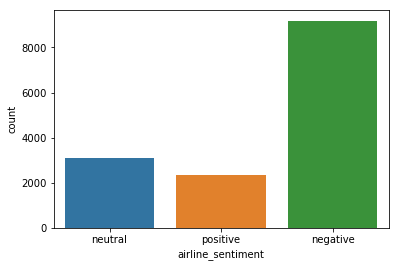

In [64]:
sns.countplot(x="airline_sentiment", data=df)
plt.show()

                    count       mean       std  min   25%   50%   75%   max
airline_sentiment                                                          
negative           9178.0  20.387557  6.100020  2.0  17.0  22.0  25.0  35.0
neutral            3099.0  15.290094  7.150738  2.0  10.0  15.0  21.0  34.0
positive           2363.0  14.478206  7.266129  2.0   8.0  14.0  21.0  33.0


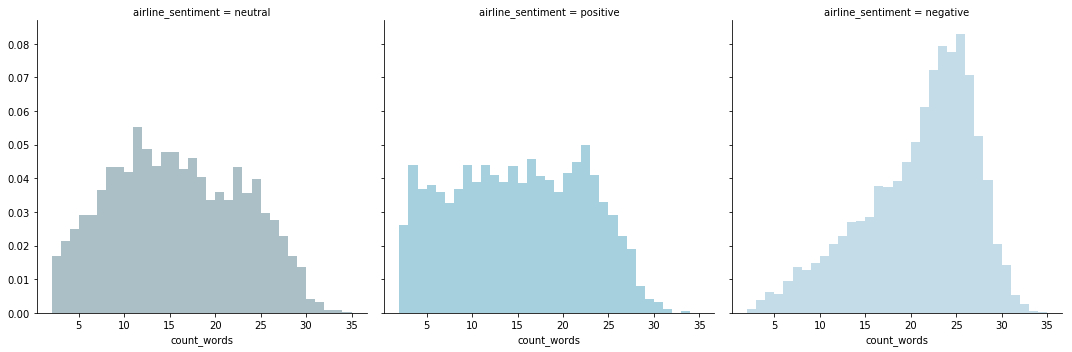

                    count      mean       std  min  25%  50%  75%  max
airline_sentiment                                                     
negative           9178.0  1.111244  0.365420  1.0  1.0  1.0  1.0  6.0
neutral            3099.0  1.167473  0.480102  1.0  1.0  1.0  1.0  5.0
positive           2363.0  1.138383  0.432462  1.0  1.0  1.0  1.0  6.0


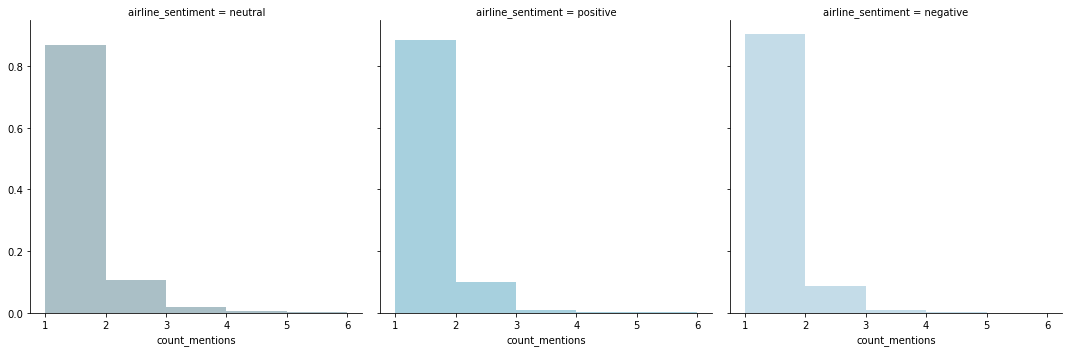

                    count      mean       std  min  25%  50%  75%  max
airline_sentiment                                                     
negative           9178.0  0.233384  0.615099  0.0  0.0  0.0  0.0  6.0
neutral            3099.0  0.212004  0.666382  0.0  0.0  0.0  0.0  6.0
positive           2363.0  0.297503  0.774776  0.0  0.0  0.0  0.0  8.0


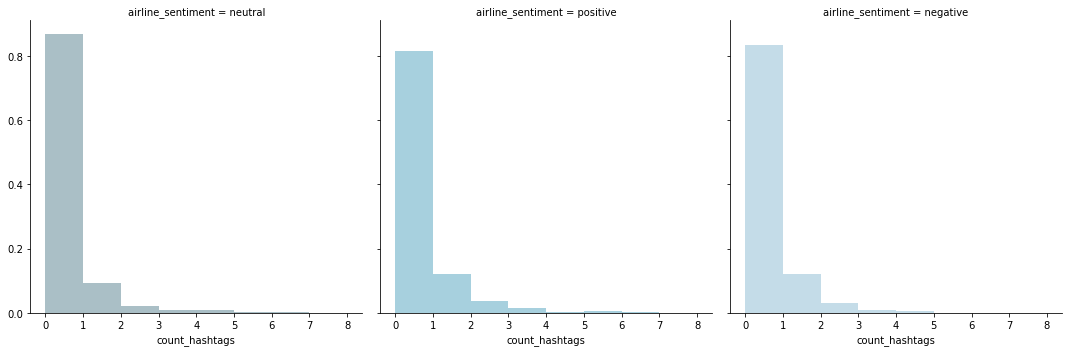

                    count      mean       std  min  25%  50%  75%   max
airline_sentiment                                                      
negative           9178.0  0.429070  1.019710  0.0  0.0  0.0  1.0  22.0
neutral            3099.0  0.462085  0.939468  0.0  0.0  0.0  1.0  11.0
positive           2363.0  0.461278  1.234078  0.0  0.0  0.0  1.0  20.0


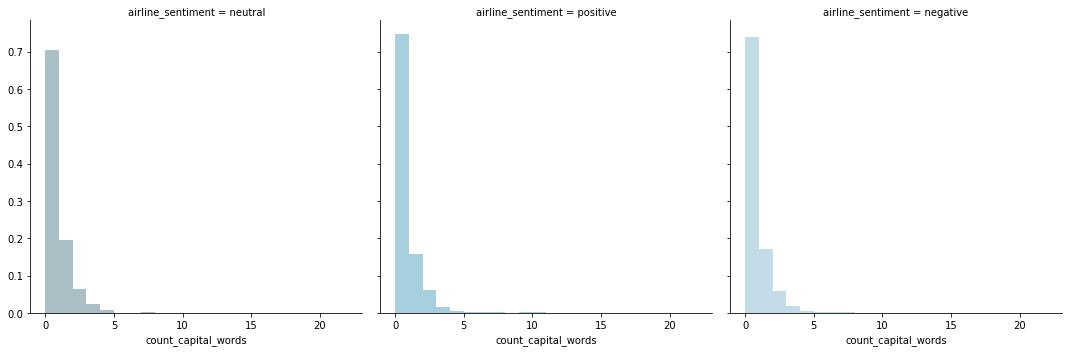

                    count      mean       std  min  25%  50%  75%   max
airline_sentiment                                                      
negative           9178.0  0.634125  1.143958  0.0  0.0  0.0  1.0  27.0
neutral            3099.0  0.665053  0.928761  0.0  0.0  0.0  1.0  12.0
positive           2363.0  0.892510  1.199191  0.0  0.0  1.0  1.0  13.0


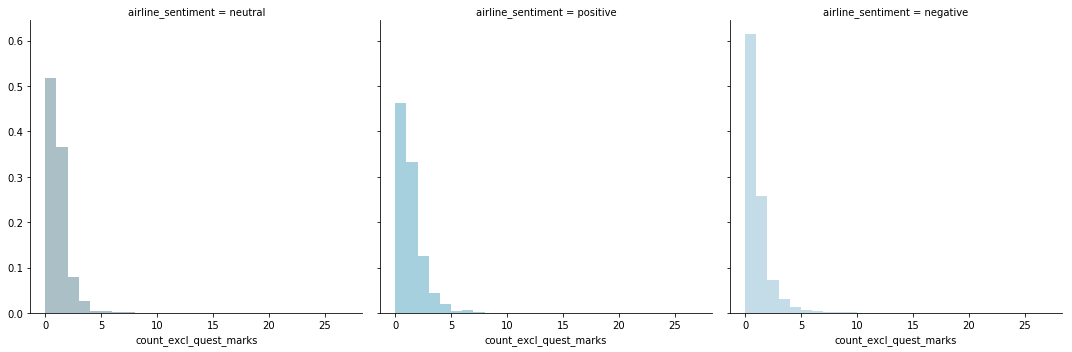

In [72]:
from sklearn.base import BaseEstimator, TransformerMixin
class TextCounts(BaseEstimator, TransformerMixin):
    
    def count_regex(self, pattern, tweet):
        return len(re.findall(pattern, tweet))
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        count_words = X.apply(lambda x: self.count_regex(r'\w+', x)) 
        count_mentions = X.apply(lambda x: self.count_regex(r'@\w+', x))
        count_hashtags = X.apply(lambda x: self.count_regex(r'#\w+', x))
        count_capital_words = X.apply(lambda x: self.count_regex(r'\b[A-Z]{2,}\b', x))
        count_excl_quest_marks = X.apply(lambda x: self.count_regex(r'!|\?', x))
        
        df1= pd.DataFrame({'count_words': count_words
                           , 'count_mentions': count_mentions
                           , 'count_hashtags': count_hashtags
                           , 'count_capital_words': count_capital_words
                           , 'count_excl_quest_marks': count_excl_quest_marks
                          })
        
        return df1
tc = TextCounts()
df_= tc.fit_transform(df.text)
df_['airline_sentiment'] = df.airline_sentiment
def show_dist(df, col):
    print(df.groupby('airline_sentiment')[col].describe())
    bins = np.arange(df[col].min(), df[col].max() + 1)
    g = sns.FacetGrid(df, col='airline_sentiment', size=5, hue='airline_sentiment', palette="PuBuGn_d")
    g = g.map(sns.distplot, col, kde=False, norm_hist=True, bins=bins)
    plt.show()
show_dist(df_, 'count_words')
show_dist(df_, 'count_mentions')
show_dist(df_, 'count_hashtags')
show_dist(df_, 'count_capital_words')
show_dist(df_, 'count_excl_quest_marks')


Using the above newfound informtion:
* Maximum size of each tweet is **36**
* A minimum of 1 and a maximum of 6 mentions in each tweet (specifying Twitter trends).
* Maximum tweets have no hashtags
* Capital words' usage is also non-existent
* More exclamation or question marks in positive tweeets

In [77]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
class CleanText(BaseEstimator, TransformerMixin):
   
    def remove_mentions(self, input_text):
        return re.sub(r'@\w+', '', input_text)
    
    def remove_urls(self, input_text):
        return re.sub(r'http.?://[^\s]+[\s]?', '', input_text)
    
    def emoji_oneword(self, input_text):
        return input_text.replace('_','')
    
    def remove_punctuation(self, input_text):
        # Make translation table
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
        return input_text.translate(trantab)

    def remove_digits(self, input_text):
        return re.sub('\d+', '', input_text)
    
    def to_lower(self, input_text):
        return input_text.lower()
    
    def remove_stopwords(self, input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
    def stemming(self, input_text):
        porter = PorterStemmer()
        words = input_text.split() 
        stemmed_words = [porter.stem(word) for word in words]
        return " ".join(stemmed_words)
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        clean_X = X.apply(self.remove_mentions).apply(self.remove_urls).apply(self.emoji_oneword).apply(self.remove_punctuation).apply(self.remove_digits).apply(self.to_lower).apply(self.remove_stopwords).apply(self.stemming)
        return clean_X
ct = CleanText()
df_clean = ct.fit_transform(df.text)

In [82]:
print(df_clean)

0                                                     said
1                             plu ad commerci experi tacki
2                     today must mean need take anoth trip
3        realli aggress blast obnoxi entertain guest fa...
4                                     realli big bad thing
5        serious would pay flight seat play realli bad ...
6        ye nearli everi time fli vx “ear worm” won’t g...
7        realli miss prime opportun men without hat parodi
8                                               well t…but
9                               amaz arriv hour earli good
10           know suicid second lead caus death among teen
11         lt pretti graphic much better minim iconographi
12       great deal alreadi think nd trip amp even gone...
13            fli fabul seduct sky take stress away travel
14                                                   thank
15                               sfo pdx schedul still mia
16       excit first cross countri flight lax mco heard.

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

X=df_clean
y=df.airline_sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)
vec= CountVectorizer(stop_words='english',analyzer="word")
X_train= vec.fit_transform(X_train)
X_test= vec.transform(X_test)
feat= vec.get_feature_names()
acc= []

clf1 = RandomForestClassifier(n_estimators= 100, random_state=14)
clf2= KNeighborsClassifier(n_neighbors= 7, weights= 'distance')
clf3= SVC(kernel= 'linear')
clf4= SVC(kernel= 'poly')
clf5= DecisionTreeClassifier(max_depth= 10)
clf6= GradientBoostingClassifier(n_estimators= 100, random_state= 14)
clfs= [clf1, clf2, clf3, clf4, clf5, clf6]
for i in clfs:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    print('---- For ', i, '----')
    a= accuracy_score(y_test, y_pred)
    print(a)
    acc.append(a)

---- For  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=14, verbose=0, warm_start=False) ----
0.749772313297
---- For  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='distance') ----
0.557832422587
---- For  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) ----
0.761384335155
---- For  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3,

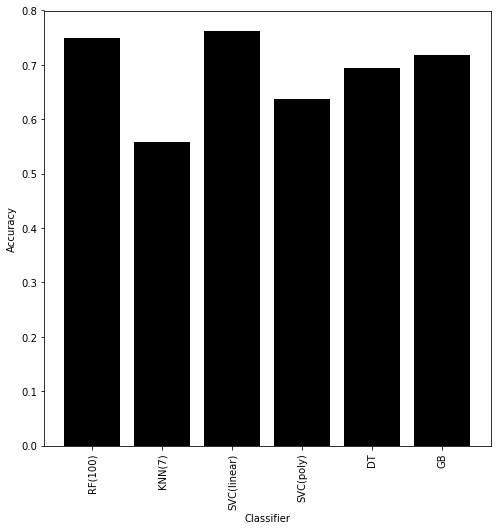

In [105]:
plt.figure(figsize= (8, 8))
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.bar(range(6), acc, color='k')
__= ['RF(100)', 'KNN(7)', 'SVC(linear)', 'SVC(poly)', 'DT', 'GB']
plt.xticks(range(6), __, rotation=90)
plt.show()